In [1]:
import tensorflow as tf
import tensorflow_io as tfio
import os 

/Users/rosameliacarioni/miniconda3/envs/bach_thesis_4/lib/python3.9/site-packages/tensorflow_io-0.32.0-py3.9-macosx-11.0-arm64.egg/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/Users/rosameliacarioni/miniconda3/envs/bach_thesis_4/lib/python3.9/site-packages/tensorflow_io-0.32.0-py3.9-macosx-11.0-arm64.egg/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["[Errno 2] The file to load file system plugin from does not exist.: '/Users/rosameliacarioni/miniconda3/envs/bach_thesis_4/lib/python3.9/site-packages/tensorflow_io-0.32.0-py3.9-macosx-11.0-arm64.egg/tensorflow_io/python/ops/libtensorflow_io_plugins.so'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/Users/rosameliacarioni/miniconda3/envs/bach_thesis_4/lib/python3.9/site-packages/tensorflow_io-0.32.0-py3.9-macosx-11.0-arm64.egg/tensorflow_io/python/ops/__init__.py:104: UserWarning

In [20]:
def convert_to_spectrogram(wave):
    spectrogram = tf.signal.stft(wave, frame_length=256, frame_step=8, fft_length = 256)  # Paper: 'Automated detection of gunshots in tropical forests using CNN' 

    # 2. Obtain the magnitude of the STFT
    # spectrogram = tf.abs(spectrogram)

    # 3. Tranform it into appropiate format for deep learning model by adding the channel dimension (in this case 1)
    # spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [3]:
def read_in_data(file_name, label): 
    file_contents = tf.io.read_file(file_name) #retuns a string 
    wave, _ = tf.audio.decode_wav(file_contents, desired_channels=1) # transforms string into actual wav
    wave = wave - tf.reduce_mean(wave) # remove the mean 
    wave = wave / tf.reduce_max(tf.abs(wave)) #normalize 
    wave = tf.squeeze(wave, axis= -1) #removes axis 
    return wave, label

In [4]:
file = '/Users/rosameliacarioni/University/Thesis/code/data/train/Clips_ELP/ecoguns0.wav'

In [21]:
wave, label = read_in_data(file, 1)
spect= convert_to_spectrogram(wave)

In [27]:
len(wave)

7644

In [22]:
spect

<tf.Tensor: shape=(924, 129), dtype=complex64, numpy=
array([[-6.5354509e+00+0.0000000e+00j,  1.6171551e+00-6.5834284e+00j,
         3.6988525e+00+1.8338408e+00j, ...,
        -1.0240126e-01-7.7363253e-02j,  8.7109566e-02-2.9643774e-02j,
        -9.3066692e-03+0.0000000e+00j],
       [-8.2822943e+00+0.0000000e+00j,  2.5815125e+00-7.2186489e+00j,
         3.1522062e+00+3.2484994e+00j, ...,
        -1.3966358e-01-4.0098906e-02j,  8.5389972e-02-6.3920975e-02j,
         7.2565079e-03+0.0000000e+00j],
       [-1.0091326e+01+0.0000000e+00j,  3.7223229e+00-7.7892694e+00j,
         2.0621452e+00+4.2339969e+00j, ...,
        -1.6105032e-01+1.5802145e-02j,  7.1873069e-02-9.8008871e-02j,
         2.5590897e-02+0.0000000e+00j],
       ...,
       [ 1.4095570e+01+0.0000000e+00j, -1.1955126e+01-9.8342872e-01j,
         7.6145763e+00+1.2173843e+00j, ...,
         1.2359214e-01+7.4725509e-02j, -9.5130920e-02-9.6250474e-03j,
         2.1346045e-01+0.0000000e+00j],
       [ 1.3845791e+01+0.0000000e+00j,

In [23]:
frame_length=256
frame_step=8
fft_length = 256

result = tf.signal.inverse_stft(
    spect,
    frame_length,
    frame_step,
    fft_length,
    window_fn=tf.signal.inverse_stft_window_fn(frame_step),
) 

In [26]:
len(result)

7640

Compare them 

In [111]:
import numpy as np 

tolerance = 1e-6  # set a tolerance
equal = np.allclose(wave.numpy(), result.numpy(), atol=tolerance)
equal

ValueError: operands could not be broadcast together with shapes (7644,) (7808,) 

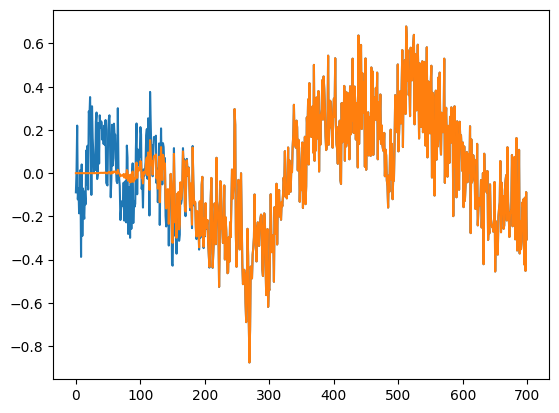

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
plt.plot(wave[:700])
plt.plot(result[:700])
plt.show()
plt.clf()

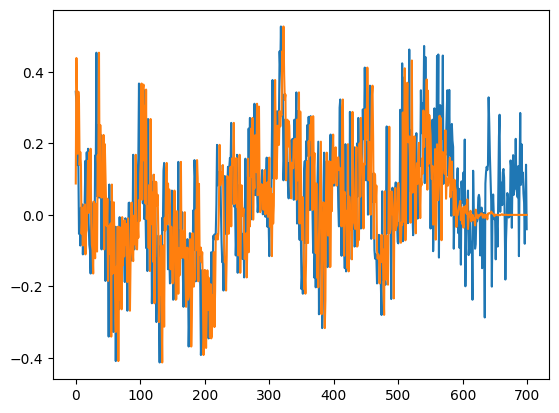

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
plt.plot(wave[-700:])
plt.plot(result[-700:])
plt.show()
plt.clf()

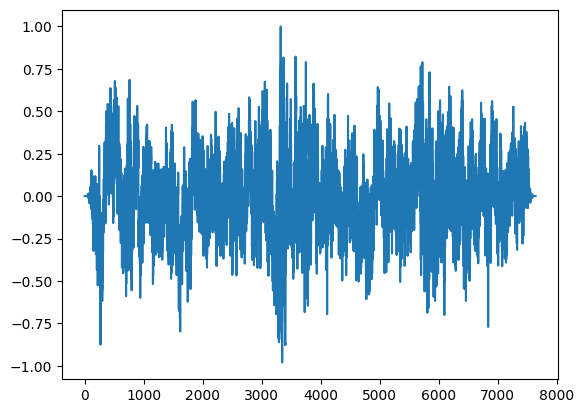

<Figure size 640x480 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
plt.plot(result)
plt.show()
plt.clf()